In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from collections import Counter
nltk.download('stopwords')
pd.set_option('display.max_colwidth', -1)
stop_words = set(nltk.corpus.stopwords.words("english"))

bad_words = ["his", "her", "their", "you", 'him', 'them', 'it']
start_words = ['what', 'why', 'how', 'where', 'who', 'which', 'when']
out_file = 'output_questions_QG-Net.pt.txt.prob.txt'

%store -r context_ans
contexts, ansIdxs = list(zip(*context_ans)) 

answers = [[contexts[i][k] for k in ansIdxs[i]] for i in range(len(contexts))]

def circular(question):
    words = question.split()
    word_counts = Counter(words)
    if any([c>=2 and w not in stop_words for w, c in word_counts.most_common()]):
        # How many claims were brought by individuals to settle claims against Purdue? << nonstop word present twice
        return True

[nltk_data] Downloading package stopwords to /Users/emily/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


what happened to the populations of populations ?
what happened to the populations of populations ?
% has ambiguous pronoun: 0.23529411764705882
% circular: 0.11764705882352941


(array([0, 1]), <a list of 2 Text xticklabel objects>)

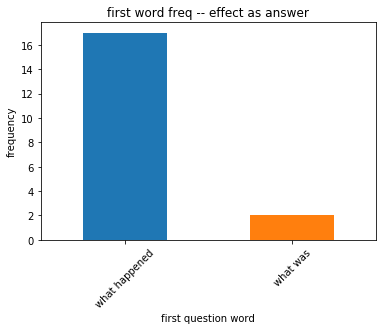

In [110]:
df = pd.read_csv(out_file, sep="\n", header=None)
df.columns = ["q"]
df['first'] = df['q'].apply(lambda x: ' '.join(x.split()[:1]))
df['first2'] = df['q'].apply(lambda x: ' '.join(x.split()[:2]))
df['context'] = contexts
df['answer'] = answers

has_badword = 0
is_circular = 0
for q in df['q']:
    if circular(q):
        is_circular+=1
        print(q)
    for w in bad_words:
        if w in q:
            has_badword+=1
            break
print('% has ambiguous pronoun:', has_badword/len(df))
print('% circular:', is_circular/len(df))


df['first'].value_counts().plot(kind = 'bar')
df['first2'].value_counts().plot(kind = 'bar')
plt.xlabel('first question word')
plt.ylabel('frequency')
plt.title('first word freq -- effect as answer')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

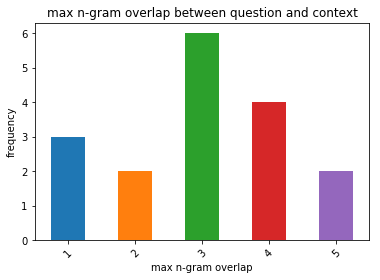

In [111]:

def matchingString(x,y):
    match=''
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            k=1
            # now applying while condition untill we find a substring match and length of substring is less than length of x and y
            while (i+k <= len(x) and j+k <= len(y) and x[i:i+k]==y[j:j+k]):
                if len(match) <= len(x[i:i+k]):
                   match = x[i:i+k]
                k=k+1
    return match  

ngram = []
ngram_ans = []
for i in range(len(df)):
    q = df['q'][i]
    c = ' '.join(df['context'][i])
    a = ' '.join(df['answer'][i])
    mc = matchingString(q,c).strip()
    ma = matchingString(q,a).strip()
    ngram.append(mc.count(' ')+1)
    ngram_ans.append(ma.count(' ')+1)
    
df['ngram match'] = ngram
df['ngram match ans'] = ngram_ans

df['ngram match'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('max n-gram overlap')
plt.ylabel('frequency')
plt.title('max n-gram overlap between question and context')
plt.xticks(rotation=45)


(array([0]), <a list of 1 Text xticklabel objects>)

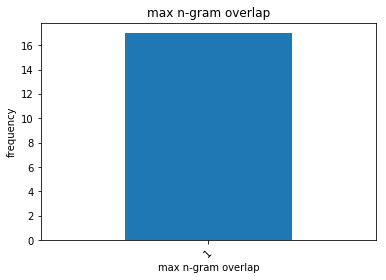

In [112]:
df['ngram match ans'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('max n-gram overlap')
plt.ylabel('frequency')
plt.title('max n-gram overlap')
plt.xticks(rotation=45)